In [2]:
import os
import random
from random import randint
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

2023-09-12 11:57:43.217100: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-12 11:57:43.248514: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 11:57:43.426396: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-12 11:57:43.427694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 11:57:44.041413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
def open_raw(
    raw_file,
    imageWidth,
    imageHeight,
    umin=137,
    umax=52578,
):
    rawInFile = open(raw_file, "rb")
    rawImageArray = np.fromfile(
        rawInFile, dtype=np.float32, count=imageHeight * imageWidth
    )
    rawRGBimage = Image.frombuffer(
        "I;16",
        [imageWidth, imageHeight],
        rawImageArray,  # .astype('I;16'),
        "raw",
        "I;16",
        0,
        1,
    )
    rawRGBarray = np.array(rawRGBimage)
    rawRGBarray.resize((imageHeight, imageWidth))

    rawRGBarray -= umin
    rawRGBarray = rawRGBarray / (umax - umin)

    return rawRGBarray



In [54]:
folder = f"{randint(1, 4)}"
files = os.listdir(f"../data/{folder}/")
random_file = random.choice(files)
random_file_w_path = f"../data/{folder}/{random_file}"
random_file_w_path

'../data/4/IE1705794_P406.i180702.raw'

In [4]:
imageWidth,imageHeight = 400,400

In [23]:
path = "/home/gabrielidis/These/medical_project/artefacts/generated_test/experiment_6/low/ground_truth/38_ground_truth.raw"
path2 = "/home/gabrielidis/These/medical_project/artefacts/data/acquisition_0/IE1705794_P406.i180019.raw"
path3 = "/home/gabrielidis/These/medical_project/artefacts/generated_test/experiment_4/acquisition_1/big_endian/ground_truth/17_ground_truth.raw"
rawRGBarray = open_raw(path3, imageHeight, imageWidth)
rawRGBarray.shape

(400, 400)

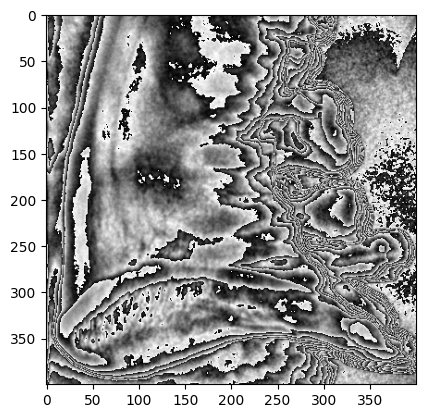

In [24]:
plt.imshow(rawRGBarray, cmap="gray")

In [61]:
rawRGBarray.shape
resized = tf.image.resize(tf.expand_dims(rawRGBarray, axis = -1), [512, 512])
resized.shape

TensorShape([512, 512, 1])

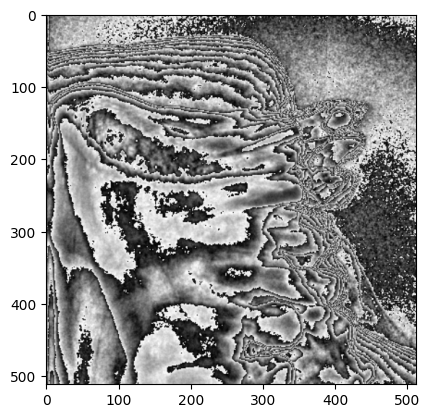

In [62]:
plt.imshow(resized.numpy(), cmap="gray")